# Apartment Price Prediction

The dataset that we will use contains information about apartments for sale in the city of Novi Sad and the surrounding area. The data was scraped on May 28, 2023 and I cleaned the data immediately after scraping it, so we won't have to do that here. First we will visualize the data and then try to apply the regression models and predict the price of the apartment. We will use Random Forest Regressor and XGBoost Regressor.

Table of contents:
1. [Preparing the Data](#1)<br>
    1.1 [Loading the Dataset](#1-1)<br>
    1.2 [Dataset Overview](#1-2)<br>
2. [Visualization](#2)<br>
    2.1 [Aparments Price Distribution](#2-1)<br>
    2.2 [Numerical Data Distribution](#2-2)<br>
    2.3 [Scatter Plot Matrix](#2-3)<br>
    2.4 [Correlation Matrix](#2-4)<br>
3. [Training and Evaluating Regression Models](#3)<br>
    3.1 [Encoding Place Column and Splitting the Data](#3-1)<br>
    3.2 [Random Forest Regressor](#3-2)<br>
    3.3 [XGBoost Regressor](#3-3)<br>
    3.4 [Conclusion](#3-4)<br>

## 1. Preparing the Data <a id='1'></a>

**Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap
from scipy.stats import gaussian_kde
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

### 1.1 Loading the Dataset <a id='1-1'></a>

In [2]:
df = pd.read_csv('./data/apartments_data.csv')
df.head()

,Place,Surface,Room Number,Flooring,Balcony,Price
0,Adamovićevo Naselje,60,3.0,2,1,185000.0
1,Detelinara,62,3.0,3,1,99000.0
2,Adice,35,1.5,1,1,58330.0
3,Klisa,91,4.0,1,1,133100.0
4,Adice,51,2.0,0,1,73650.0


In [3]:
df.shape

(1906, 6)

### 1.2 Dataset Overview <a id='1-2'></a>

**Place** - Name of the area in which the apartment is located
 - Adamovićevo Naselje   
 - Adice
 - Banatić
 - Bulevar Evrope
 - Bulevar Oslobođenja
 - Detelinara
 - Futoška
 - Futoški Put
 - Grbavica
 - Jugovićevo
 - Kamenjar
 - Klisa
 - Liman
 - Majur
 - Mali Beograd
 - Nova Detelinara
 - Novo Naselje
 - Petrovaradin
 - Podbara
 - Rotkvarija
 - Sajlovo
 - Sajmište
 - Salajka
 - Satelit
 - Sremska Kamenica
 - Stari Grad
 - Telep
 - Veternik
 
**Surface** - Area of the apartment in square meters

**Room Number** - Number of rooms in the apartment

**Flooring** - Number of the floor on which the apartment is located
 - -1 - Basement
 - 0 - Ground floor
 - 1 to 17 - 1st to 17th floor
 - 18 - Loft

**Balcony** - Does the apartment have a balcony
 - 0 - No
 - 1 - Yes
 
**Price** - Estimated price of the apartment

## 2. Visualization <a id='2'></a>

### 2.1 Aparments Price Distribution <a id='2-1'></a>

count      1906.00
mean     138179.48
std       75389.63
min       27500.00
25%       90000.00
50%      123600.00
75%      163770.00
max     1018670.00
Name: Price, dtype: float64


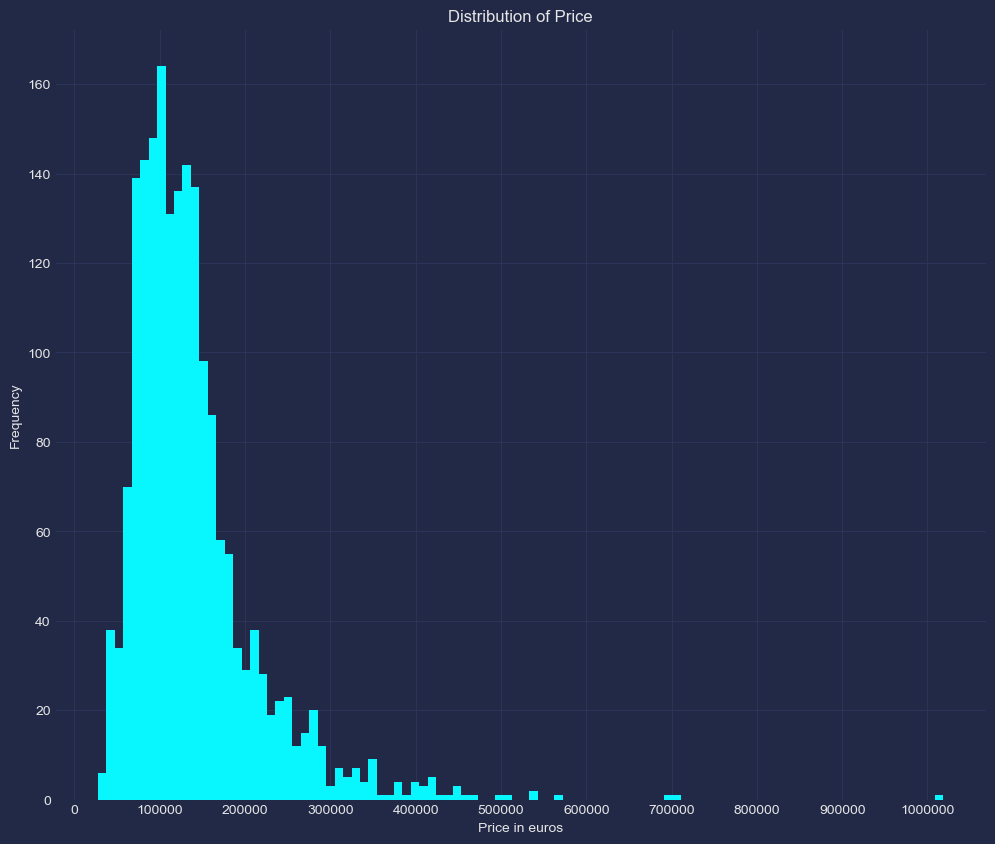

In [4]:
pd.options.display.float_format = '{:.2f}'.format
print(df['Price'].describe())

plt.style.use('cyberpunk')

plt.figure(figsize=(12, 10))
plt.hist(df['Price'], bins=100)

plt.xlabel('Price in euros')
plt.ylabel('Frequency')
plt.xticks(range(0, 1100000, 100000))
plt.ticklabel_format(scilimits=(-5, 8))
plt.title('Distribution of Price')

plt.show()

### 2.2 Numerical Data Distribution <a id='2-2'></a>

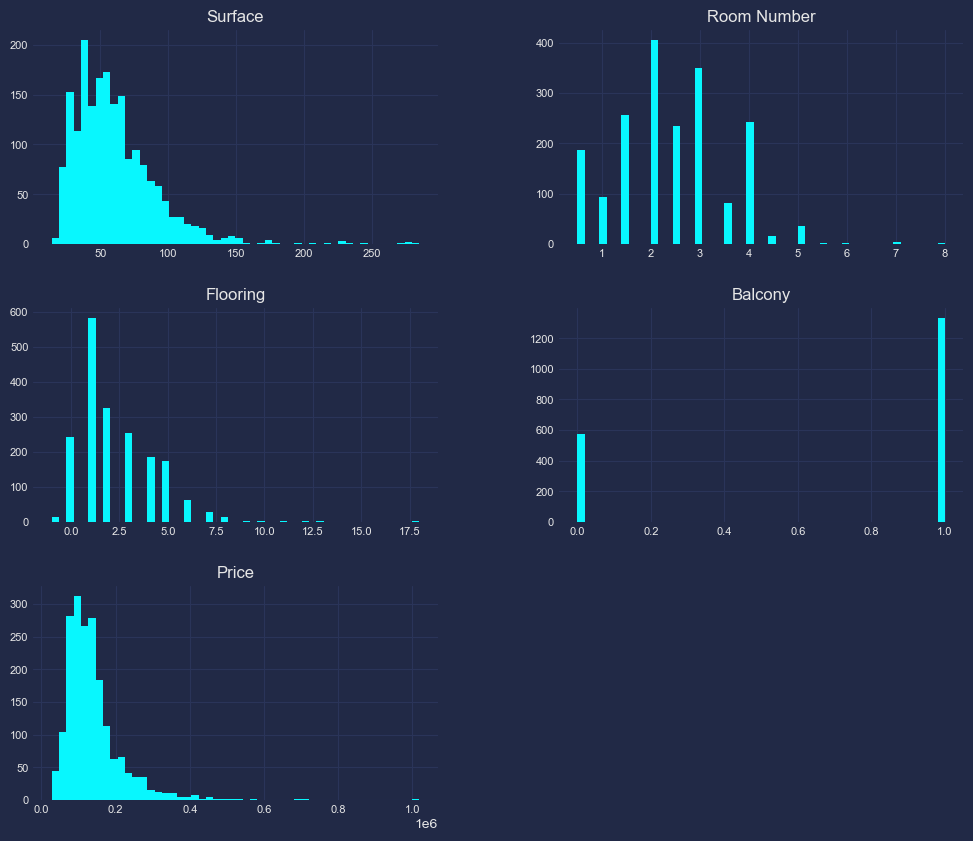

In [5]:
df_num = df.select_dtypes(include = ['float64', 'int64'])

df_num.hist(figsize=(12, 10), bins=50, xlabelsize=8, ylabelsize=8);

### 2.3 Scatter Plot Matrix <a id='2-3'></a>

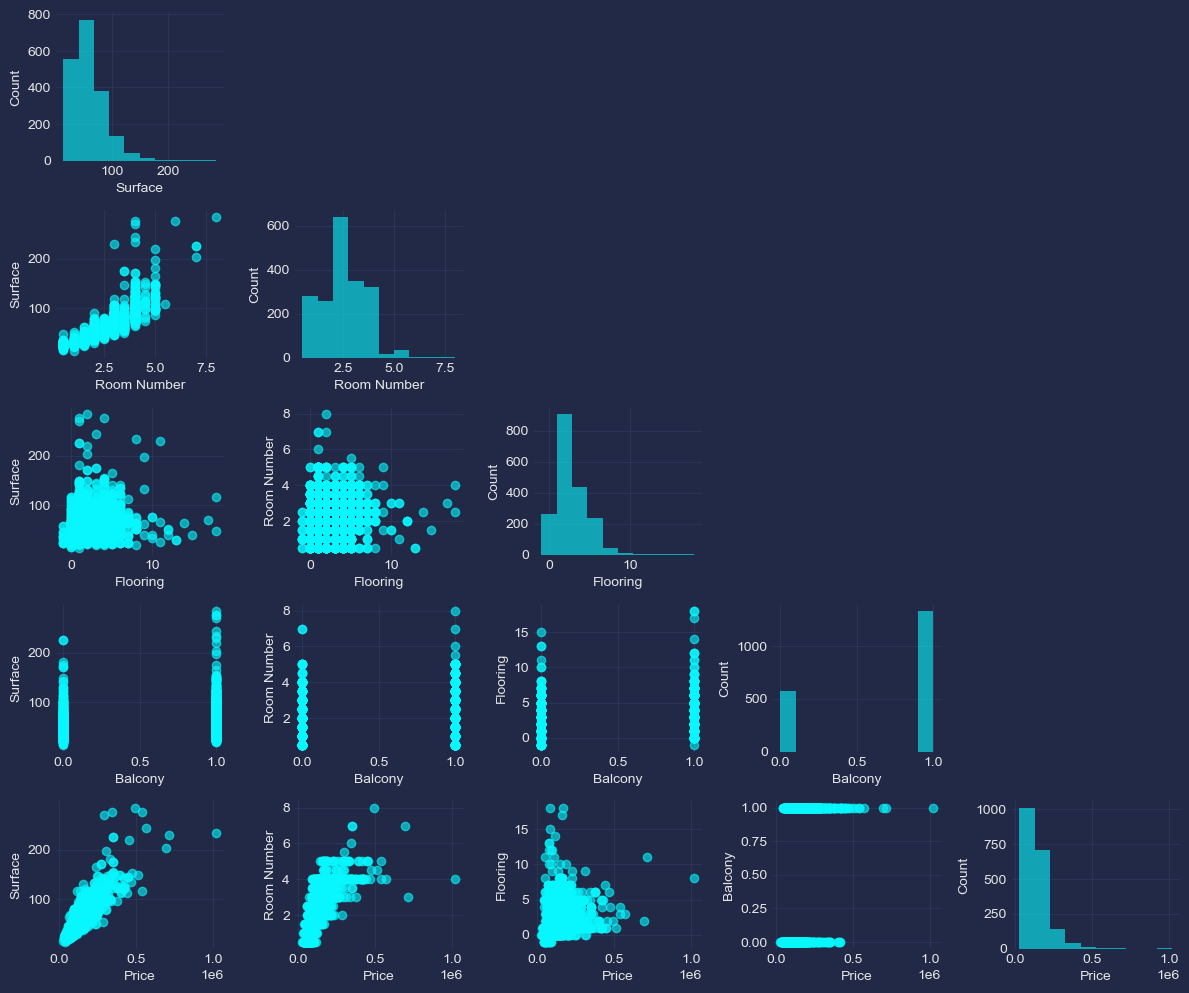

In [6]:
fig, axs = scatterplotmatrix(df_num.values, figsize=(12, 10), 
                             names=df_num.columns, alpha=0.6)

plt.tight_layout()
plt.show()

### 2.4 Correlation Matrix <a id='2-4'></a>

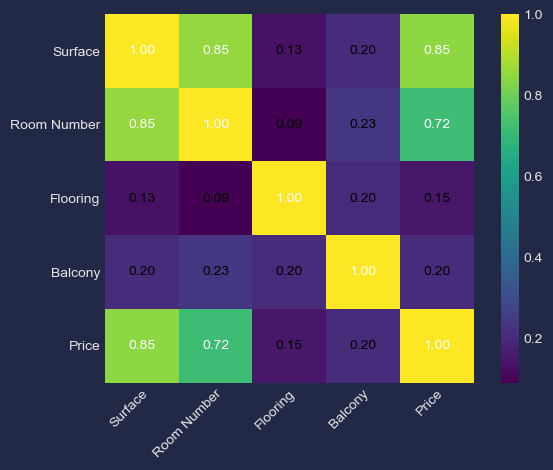

In [7]:
cm = np.corrcoef(df_num.values.T)
hm = heatmap(cm, row_names=df_num.columns, column_names=df_num.columns)

plt.tight_layout()
plt.show()

## 3. Training and Evaluating Regression Models <a id='3'></a>

### 3.1 Encoding Place Column and Splitting the Data <a id='3-1'></a>

In [8]:
df['Place_encoded'] = df.groupby('Place')['Price'].transform('mean')

X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123)

X_train = X_train.drop('Place', axis=1)
X_test = X_test.drop('Place', axis=1)

### 3.2 Random Forest Regressor <a id='3-2'></a>

In [9]:
forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='squared_error', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'RMSE train: {np.sqrt(mse_train):.2f}')
print(f'RMSE test: {np.sqrt(mse_test):.2f}\n')

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'MAE train: {mae_train:.2f}')
print(f'MAE test: {mae_test:.2f}\n')

r2_train = r2_score(y_train, y_train_pred)
r2_test =r2_score(y_test, y_test_pred)
print(f'R² train: {r2_train:.2f}')
print(f'R² test: {r2_test:.2f}')

RMSE train: 13571.02
RMSE test: 25550.52

MAE train: 7201.09
MAE test: 15515.41

R² train: 0.97
R² test: 0.88


Above we can see Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and R² results for train and test set, using Random Forest Regressor model. MAE is probably the most intuitive interpretation of the model performance as it's on the same scale as the target variable, which means that it's represented in euros - mean absolute error in train set is around **7200 euros**, and around **15500 euros** in test set. <br>
Now let's take a look at the residual plots.

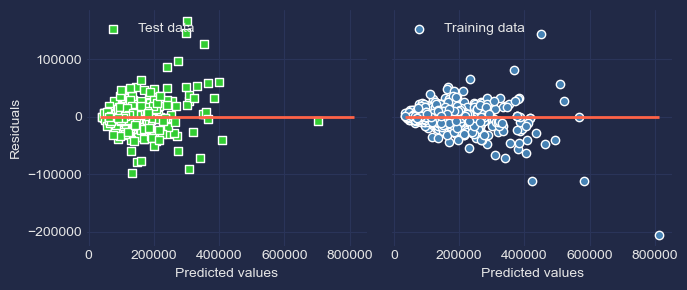

In [10]:
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

ax1.scatter(y_test_pred, y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
ax2.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
ax1.set_ylabel('Residuals')

for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100, color='tomato', lw=2)

plt.tight_layout()
plt.show()

### 3.3 XGBoost Regressor <a id='3-3'></a>

In [11]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3,
                   objective='reg:squarederror', early_stopping_rounds=100)

xgb.fit(X_train, y_train,
        eval_set=[(X_test, y_test)], verbose=False)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'RMSE train: {np.sqrt(mse_train):.2f}')
print(f'RMSE test: {np.sqrt(mse_test):.2f}\n')

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'MAE train: {mae_train:.2f}')
print(f'MAE test: {mae_test:.2f}\n')

r2_train = r2_score(y_train, y_train_pred)
r2_test =r2_score(y_test, y_test_pred)
print(f'R² train: {r2_train:.2f}')
print(f'R² test: {r2_test:.2f}')

RMSE train: 18673.81
RMSE test: 25842.66

MAE train: 12940.12
MAE test: 16242.04

R² train: 0.94
R² test: 0.88


Looking at the RMSE, MAE and R² results for train and test set, using XGBoost Regressor model, we can tell that they are quite similar to the Random Forest Regressor results. Random Forest Regressor performed slightly better in terms of RMSE and MAE metrics, but if we look at the R² metric on the test set, the results are the same. <br>
Let's see how the residual plots look.

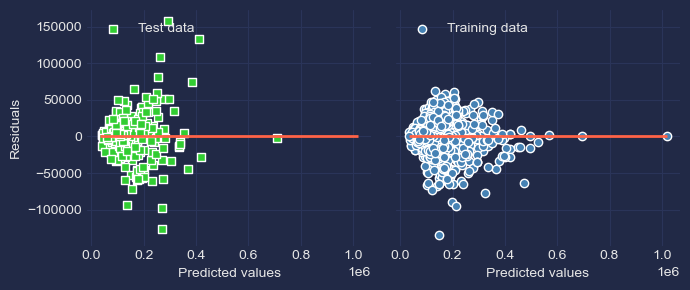

In [12]:
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

ax1.scatter(y_test_pred, y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
ax2.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
ax1.set_ylabel('Residuals')

for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100, color='tomato', lw=2)

plt.tight_layout()
plt.show()

### 3.4 Conclusion <a id='3-4'></a>

We trained the Random Forest Regressor model and the XGBoost Regressor model, and the metric results were not excellent but not bad either, considering the fact that I had to drop a lot of data columns after scraping the data, while cleaning it, because there was a lot of missing data. The Random Forest model performed slightly better than XGBoost model but there were no major differences, especially with the test set.The models can probably be further improved by tuning the hyperparameters.